# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [1]:
# General tools
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

# Classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier, RidgeClassifierCV, Lasso, LassoCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

# Data Exploration & Visualization

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(9557, 143)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## **Categories of variables**

- **Target** (income response variable)
- Identifiers
- Family
- Age
- Sex
- Education
- Marriage Status
- Disability
- Region
- Property Information (rent/rooms/size/occupants/own-or-rent)
- Utilites
- Appliances/Electronics
- Property Build
- Intersection Groups
- Squares

## Separating Variables by Category

### Identifiers

Variable | Desc.
--- | ---
Id | Unique identifier for each row
idhogar | Unique identifier for each household
parentesco1 | Indicates if this person is the head of the household

### Family

Variable | Desc.
--- | ---
parentesco1 | =1 if household head
parentesco2 | =1 if spouse/partner
parentesco3 | =1 if son/doughter
parentesco4 | =1 if stepson/doughter
parentesco5 | =1 if son/doughter in law
parentesco6 | =1 if grandson/doughter
parentesco7 | =1 if mother/father
parentesco8 | =1 if father/mother in law
parentesco9 | =1 if brother/sister
parentesco10 | =1 if brother/sister in law
parentesco11 | =1 if other family member
parentesco12 | =1 if other non family member

### Age

Variable | Desc.
--- | ---
estadocivil1 | =1 if less than 10 years old
age | Age in years

### Sex

Variable | Desc.
--- | ---
male | =1 if male
female | =1 if female

### Education

Variable | Desc.
--- | ---
escolari | years of schooling
rez_esc | Years behind in school
instlevel1 | =1 no level of education
instlevel2 | =1 incomplete primary
instlevel3 | =1 complete primary
instlevel4 | =1 incomplete academic secondary level
instlevel5 | =1 complete academic secondary level
instlevel6 | =1 incomplete technical secondary level
instlevel7 | =1 complete technical secondary level
instlevel8 | =1 undergraduate and higher education
instlevel9 | =1 postgraduate higher education

### Marriage Status

Variable | Desc.
--- | ---
estadocivil2 | =1 if free or coupled uunion
estadocivil3 | =1 if married
estadocivil4 | =1 if divorced
estadocivil5 | =1 if separated
estadocivil6 | =1 if widow/er
estadocivil7 | =1 if single

### Disability

Variable | Desc.
--- | ---
dis | =1 if disable person

### Region

Variable | Desc.
--- | ---
lugar1 | =1 region Central
lugar2 | =1 region Chorotega
lugar3 | =1 region PacÃƒÂ­fico central
lugar4 | =1 region Brunca
lugar5 | =1 region Huetar AtlÃƒÂ¡ntica
lugar6 | =1 region Huetar Norte
area1 | =1 zona urbana
area2 | =2 zona rural

### Property Information
#### Pertaining to Rent / Rooms / Size / Occupants / Crowding / Own-or-Rent)

Variable | Desc.
--- | ---
v2a1 | Monthly rent payment
hacdor | =1 Overcrowding by bedrooms
rooms |  number of all rooms in the house
hacapo | =1 Overcrowding by rooms
v14a | =1 has bathroom in the household
r4t3 | Total persons in the household
tamhog | size of the household
tamviv | number of persons living in the household
hhsize | household size
hogar_nin | Number of children 0 to 19 in household
hogar_adul | Number of adults in household
hogar_mayor | # of individuals 65+ in the household
hogar_total | # of total individuals in the household
dependency | Dependency rate (# young and old / working age)
bedrooms | number of bedrooms
overcrowding | # persons per room
tipovivi1 | =1 own and fully paid house
tipovivi2 | =1 own,  paying in installments
tipovivi3 | =1 rented
tipovivi4 | =1 precarious
tipovivi5 | =1 other(assigned,  borrowed)

### Appliances/Utilites

Variable | Desc.
--- | ---
abastaguadentro | =1 if water provision inside the dwelling
abastaguafuera | =1 if water provision outside the dwelling
abastaguano | =1 if no water provision
public | "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri | =1 electricity from private plant
noelec | =1 no electricity in the dwelling
coopele | =1 electricity from cooperative
sanitario1 | =1 no toilet in the dwelling
sanitario2 | =1 toilet connected to sewer or cesspool
sanitario3 | =1 toilet connected to  septic tank
sanitario5 | =1 toilet connected to black hole or letrine
sanitario6 | =1 toilet connected to other system
energcocinar1 | =1 no main source of energy used for cooking (no kitchen)
energcocinar2 | =1 main source of energy used for cooking electricity
energcocinar3 | =1 main source of energy used for cooking gas
energcocinar4 | =1 main source of energy used for cooking wood charcoal
elimbasu1 | =1 if rubbish disposal mainly by tanker truck
elimbasu2 | =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3 | =1 if rubbish disposal mainly by burning
elimbasu4 | =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5 | "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6 | =1 if rubbish disposal mainly other
refrig | =1 if the household has refrigerator

### Electronics

Variable | Desc.
--- | ---
v18q | owns a tablet
v18q1 | number of tablets household owns
computer | =1 if the household has notebook or desktop computer
television | =1 if the household has TV
mobilephone | =1 if mobile phone
qmobilephone | # of mobile phones

### Property Build

Variable | Desc.
--- | ---
paredblolad | =1 if predominant material on the outside wall is block or brick
paredzocalo | "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb | =1 if predominant material on the outside wall is prefabricated or cement
pareddes | =1 if predominant material on the outside wall is waste material
paredmad | =1 if predominant material on the outside wall is wood
paredzinc | =1 if predominant material on the outside wall is zink
paredfibras | =1 if predominant material on the outside wall is natural fibers
paredother | =1 if predominant material on the outside wall is other
pisomoscer | "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento | =1 if predominant material on the floor is cement
pisoother | =1 if predominant material on the floor is other
pisonatur | =1 if predominant material on the floor is  natural material
pisonotiene | =1 if no floor at the household
pisomadera | =1 if predominant material on the floor is wood
techozinc | =1 if predominant material on the roof is metal foil or zink
techoentrepiso | "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane | =1 if predominant material on the roof is natural fibers
techootro | =1 if predominant material on the roof is other
cielorazo | =1 if the house has ceiling
epared1 | =1 if walls are bad
epared2 | =1 if walls are regular
epared3 | =1 if walls are good
etecho1 | =1 if roof are bad
etecho2 | =1 if roof are regular
etecho3 | =1 if roof are good
eviv1 | =1 if floor are bad
eviv2 | =1 if floor are regular
eviv3 | =1 if floor are good

### Intersection Groups
#### Provided variables consisting of multiple categories

Variable | Desc.
--- | ---
r4h1 | Males younger than 12 years of age
r4h2 | Males 12 years of age and older
r4m1 | Females younger than 12 years of age
r4m2 | Females 12 years of age and older
r4t1 | persons younger than 12 years of age
r4t2 | persons 12 years of age and older
r4h3 | Total males in the household
r4m3 | Total females in the household
edjefe | years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa | years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
meaneduc | average years of education for adults (18+)

### Squares

Variable | Desc.
--- | ---
SQBescolari | escolari squared
SQBage | age squared
SQBhogar_total | hogar_total squared
SQBedjefe | edjefe squared
SQBhogar_nin | hogar_nin squared
SQBovercrowding | overcrowding squared
SQBdependency | dependency squared
SQBmeaned | square of the mean years of education of adults (>=18) in the household
agesq | Age squared

## Response Variable (Target)
### Income Level 
(1 = extreme poverty, 4 = non-vulnerable)

Text(0.5,1,'Poverty Level Counts')

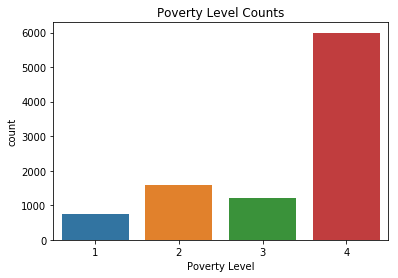

In [3]:
countByTarget = df.groupby(df.Target).count().Id

sns.countplot(df.Target)
plt.xlabel("Poverty Level")
plt.title("Poverty Level Counts")

## Property Information

### Number of Households

In [4]:
df.groupby(df.idhogar).count().shape[0]

2988

### Heads of Households

In [5]:
df.parentesco1.sum()

2973

### Monthly Rent

/Users/davidlacharite/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


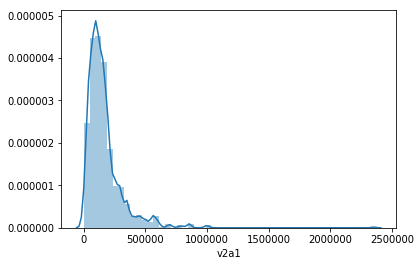

In [6]:
# Proportion of NaN values
df.v2a1.isna().sum() / len(df.v2a1)

sns.distplot(df.v2a1.dropna())

## Covariance

## Tranformations

# Cleaning

## Missing Values

In [7]:
# 5 columns with NaN values
cols_nan = list(df.columns[df.isna().any()])
cols_nan

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [8]:
# Total number of missing values
df[cols_nan].isna().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [1]:
# Proportion of missing
#values
df[cols_nan].isna().sum() / df.shape[0]

NameError: name 'df' is not defined

## Approach

Three features have very large number of missing values (72-83%).

### **v2a1** (*monthly rent payment*)  

It seems that for every household with missing values, all individuals have no rent value.  What about creating a household dataframe and filling those values based on our selected classification? The field will be dropped and revisited once a model is selected.

In [ ]:
# See if any members of household have rental value if there is a NaN for rent in household
any_nan = df.groupby('idhogar')['v2a1'].apply(lambda x: np.isnan(x).any()).mean() 
all_nan = df.groupby('idhogar')['v2a1'].apply(lambda x: np.isnan(x).all()).mean()
any_nan - all_nan

In [ ]:
df.drop('v2a1', axis=1, inplace=True)

### **v18q1** (*number of tablets in household*)  

Again, households with missing values contained missing values for all individuals, so we will set those to 0.

In [ ]:
any_nan = df.groupby('idhogar')['v18q'].apply(lambda x: np.isnan(x).any()).mean() 
all_nan = df.groupby('idhogar')['v18q'].apply(lambda x: np.isnan(x).all()).mean()
any_nan - all_nan

In [ ]:
df.v18q1.fillna(0, inplace=True)
df.head()

### **rez_esc** (*years behind in school*)  

Without domain knowledge in how to replace this data, field is dropped.

In [ ]:
df.drop("rez_esc", axis=1, inplace=True)

### **meaneduc** (*avg years education for adults (18+)*)

Will take mean of mean education level for adults in household and apply to these individuals.  

In [ ]:
educ_by_household = df[df.age >= 18].groupby('idhogar')['escolari'].mean()

def missing_educ(x, SQ=False):
    
    if SQ == False:
        col = 'meaneduc'
    else:
        col = 'SQBmeaned'
        
    # Find missing value ids
    missing_ids = x[x[col].isna()][col].keys()
    
    # Iterate over missing values and set them to correct value
    for i in missing_ids:
        if SQ == False:
            household = x.loc[i, 'idhogar']
            x.loc[i, col] = educ_by_household[household]
        else:
            avg = x.loc[i, 'meaneduc']
            x.loc[i, col] = avg ** 2
            
    return x
        
df = missing_educ(df)
df.meaneduc.isna().sum()

### **SQBmeaned** (*meaneduc squared*)

Will square value found from **meaneduc**

In [ ]:
df = missing_educ(df, SQ=True)
df.SQBmeaned.isna().sum()

### Result

In [ ]:
# Total number of missing values
df.isna().sum().sum()

## Miscellaneous

### edjefe / edjefa / dependency / SQBedjefe / SQBdependency

These columns have the following potential values:  
- *yes*
- *no*
- *float*
  
These variables will be dropped until we understanding how the variables are setup (not clear from the kaggle competition).

In [ ]:
print("Columns before:", df.shape[1])
df = df.drop(columns=['edjefe', 'edjefa', 'dependency', 'SQBedjefe', 'SQBdependency'])
print("Columns after:", df.shape[1])

### Squared Values

Here we setup our dataframe to either include only non-squared features, only squared features, or both.

(*this is only in the case of the features starting with "SQB"*)

In [ ]:
col_names = list(df.columns.values)
squared_cols = []

# Get only columns starting with "SQB"
for col in col_names:
    if "SQB" in col:
        squared_cols.append(col)
squared_cols

In [ ]:
non_squared_cols = []

# Get col names of SQB non-squared counterparts
for col in squared_cols:
    if col == "SQBmeaned":
        non_squared_cols.append(col[3:] + "uc")
    else:
        non_squared_cols.append(col[3:])
non_squared_cols

In [ ]:
# Drop squared features
# df = df.drop(columns=squared_cols)

# Drop non-squared counterparts
# df = df.drop(columns=non_squared_cols)

# Drop both
# df = df.drop(columns=squared_cols + non_squared_cols)

In [ ]:
df.shape

## Feature Importance

Using XGBoost, we will invetsigate the importance of features.

In [ ]:
X = df.drop(columns=['Target', 'Id', 'idhogar'])
y = df.Target

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=6, n_estimators=100, n_jobs=-1, subsample=0.7)

In [ ]:
xgb_model.fit(X, y)

In [ ]:
xgb.plot_importance(xgb_model, max_num_features=20)

In [ ]:
#selection = SelectFromModel(xgb_model, threshold=0.0, prefit=True)
#selected_dataset = selection.transform(X)
sns.heatmap(X)

# Classification

## Full Model (Linear Regression)

In [ ]:
# Partition explanatory and response variables
# X = df.drop(columns=['Target', 'Id', 'idhogar']) # Dropping identifiers and target
X = pd.DataFrame(df.meaneduc)
print(X.shape)

y = df['Target']
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [ ]:
clf = LinearRegression()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred, average='macro')

# Multiclass Logistic

In [ ]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [ ]:
clf_multiclass_logistic.fit(X_train, y_train)

In [ ]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

In [ ]:
f1_score(y_test, y_pred_log_reg, average='macro')

# SVM

In [ ]:
clf_SVM = SVC()

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
clf_SVM.fit(X_train, y_train)

In [ ]:
y_pred_SVM = clf_SVM.predict(X_test)

In [ ]:
f1_score(y_test, y_pred_SVM, average='macro')

# Random Forests

In [ ]:
clf_RF = RandomForestClassifier()

In [ ]:
clf_RF.fit(X_train, y_train)

In [ ]:
y_pred_RF = clf_RF.predict(X_test)

In [ ]:
f1_score(y_test, y_pred_RF, average='macro')

In [ ]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
#feature_importances

# XGB Classifier

In [ ]:
clf_xgb= xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)


In [ ]:
#results = clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])